#라이브러리 import
- 참조코드 


1.   https://velog.io/@changhtun1/Python-Decision-Tree-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%EC%8B%A4%EC%8A%B5
2.   https://velog.io/@changhtun1/ensemble
3.  https://www.youtube.com/watch?v=4Jz4_IOgS4c



In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call

In [10]:
# 트리 시각화를 위한 모듈 import
!pip install pydot

import pydot
from IPython.core.display import Image 

## iris 붖꽃데이터를 사용합니다 

In [8]:
iris = load_iris()
x = iris.data[:,2:] 
y = iris.target

In [4]:
print(f" X features -> {iris.feature_names} \n target class -> {iris.target_names} ")

 X features -> ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 target class -> ['setosa' 'versicolor' 'virginica'] 


In [ ]:
# 과제[1] 무엇과 무엇을 x 와 y로 설정한 것같나요? 
x: 꽃잎의 길이와 너비
y: 꽃의 종류

## Model 생성 의사결정트리 분류모델 

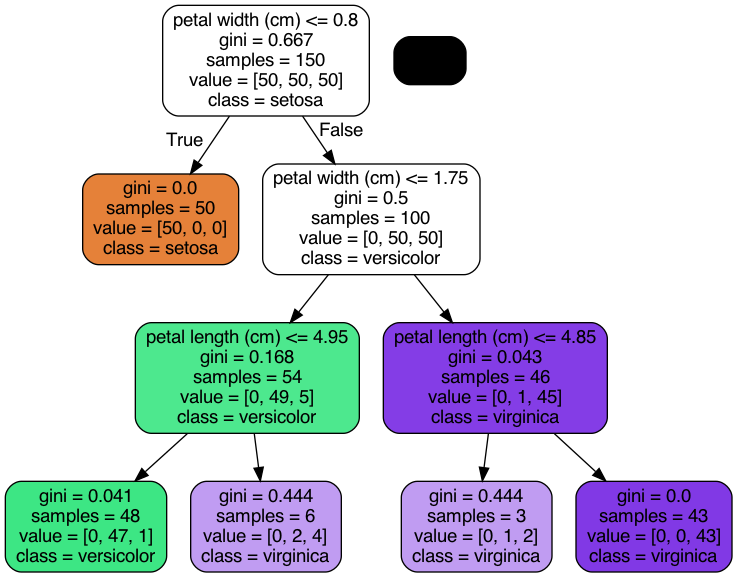

In [11]:
# 과제 [2] decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 3
tree_model =  DecisionTreeClassifier(max_depth=3)
# 모델을 피팅해보세요 
tree_model.fit(x,y)

# 출력해보세요 
dot_data = export_graphviz(
    tree_model, # 학습한 모형
    out_file = None, # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    class_names = iris.target_names, # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)

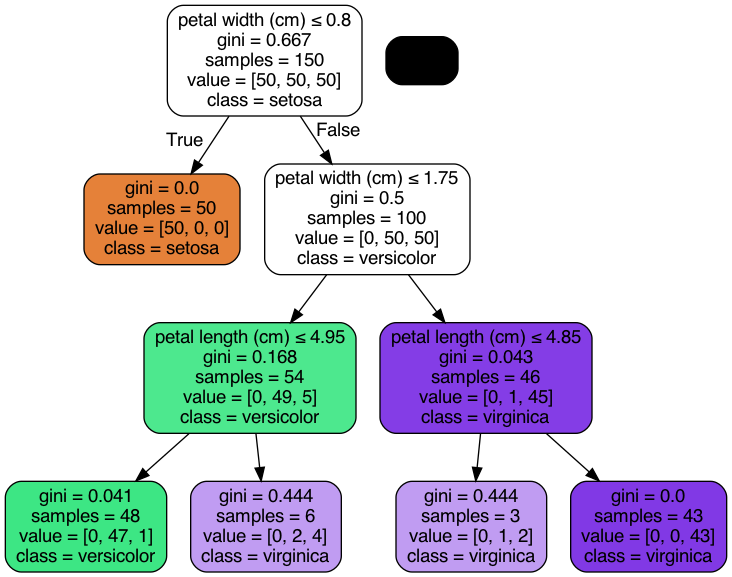

In [12]:
# 함수로 만듦
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

draw_decision_tree(tree_model,iris.feature_names[2:], iris.target_names )

In [14]:
#[과제3] 학습시킨 모델에서 길이가 3.1, 너비가 2 인 데이터는 어떤 클래스로 분류될지 확률값을 구해보세요 

tree_model.predict_proba([[3.1, 2]])

array([[0.        , 0.33333333, 0.66666667]])

##가지치기 

In [15]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
class_names = load_breast_cancer().target_names

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [18]:
tree_not_tuned= DecisionTreeClassifier(random_state=0)

# 과제[4] 학습데이터셋에만 피팅시켜봅시다
tree_not_tuned.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']

#과제 [5] 학습 데이터에 대해 교차검증하세요) 

tree_scores = cross_validate(tree_not_tuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)

print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.923


max_depth : 트리 최대 깊이

max_depth 감소 => 모델 규제 증가 => 과적합 감소
min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수

min_samples_split 증가 => 모델 규제 증가 => 과적합 감소
min_samples_leaf : leaf node가 가지고 있어야할 최소 샘플 수

min_samples_leaf 증가 => 모델 규제 증가 => 과적합 감소
min_weight_fraction_leaf : min_samples_leaf와 비슷하지만, 가중치가 부여된 전체 샘플 수에서의 비율

min_weight_fraction_leaf 증가 => 모델 규제 증가 => 과적합 감소
max_leaf_nodes : leaf node의 총 최대 개수

max_leaf_nodes 감소 => 모델 규제 증가 => 과적합 감소
max_features : 최상의 분할을 찾을 때 고려할 기능의 수

max_features 감소 => 모델 규제 증가 => 과적합 감소




```
TIP : min_으로 시작하는 매개변수 증가 => 모델 규제 증가 => 과적합 감소
TIP : max_으로 시작하는 매개변수 감소 => 모델 규제 증가 => 과적합 감소
```




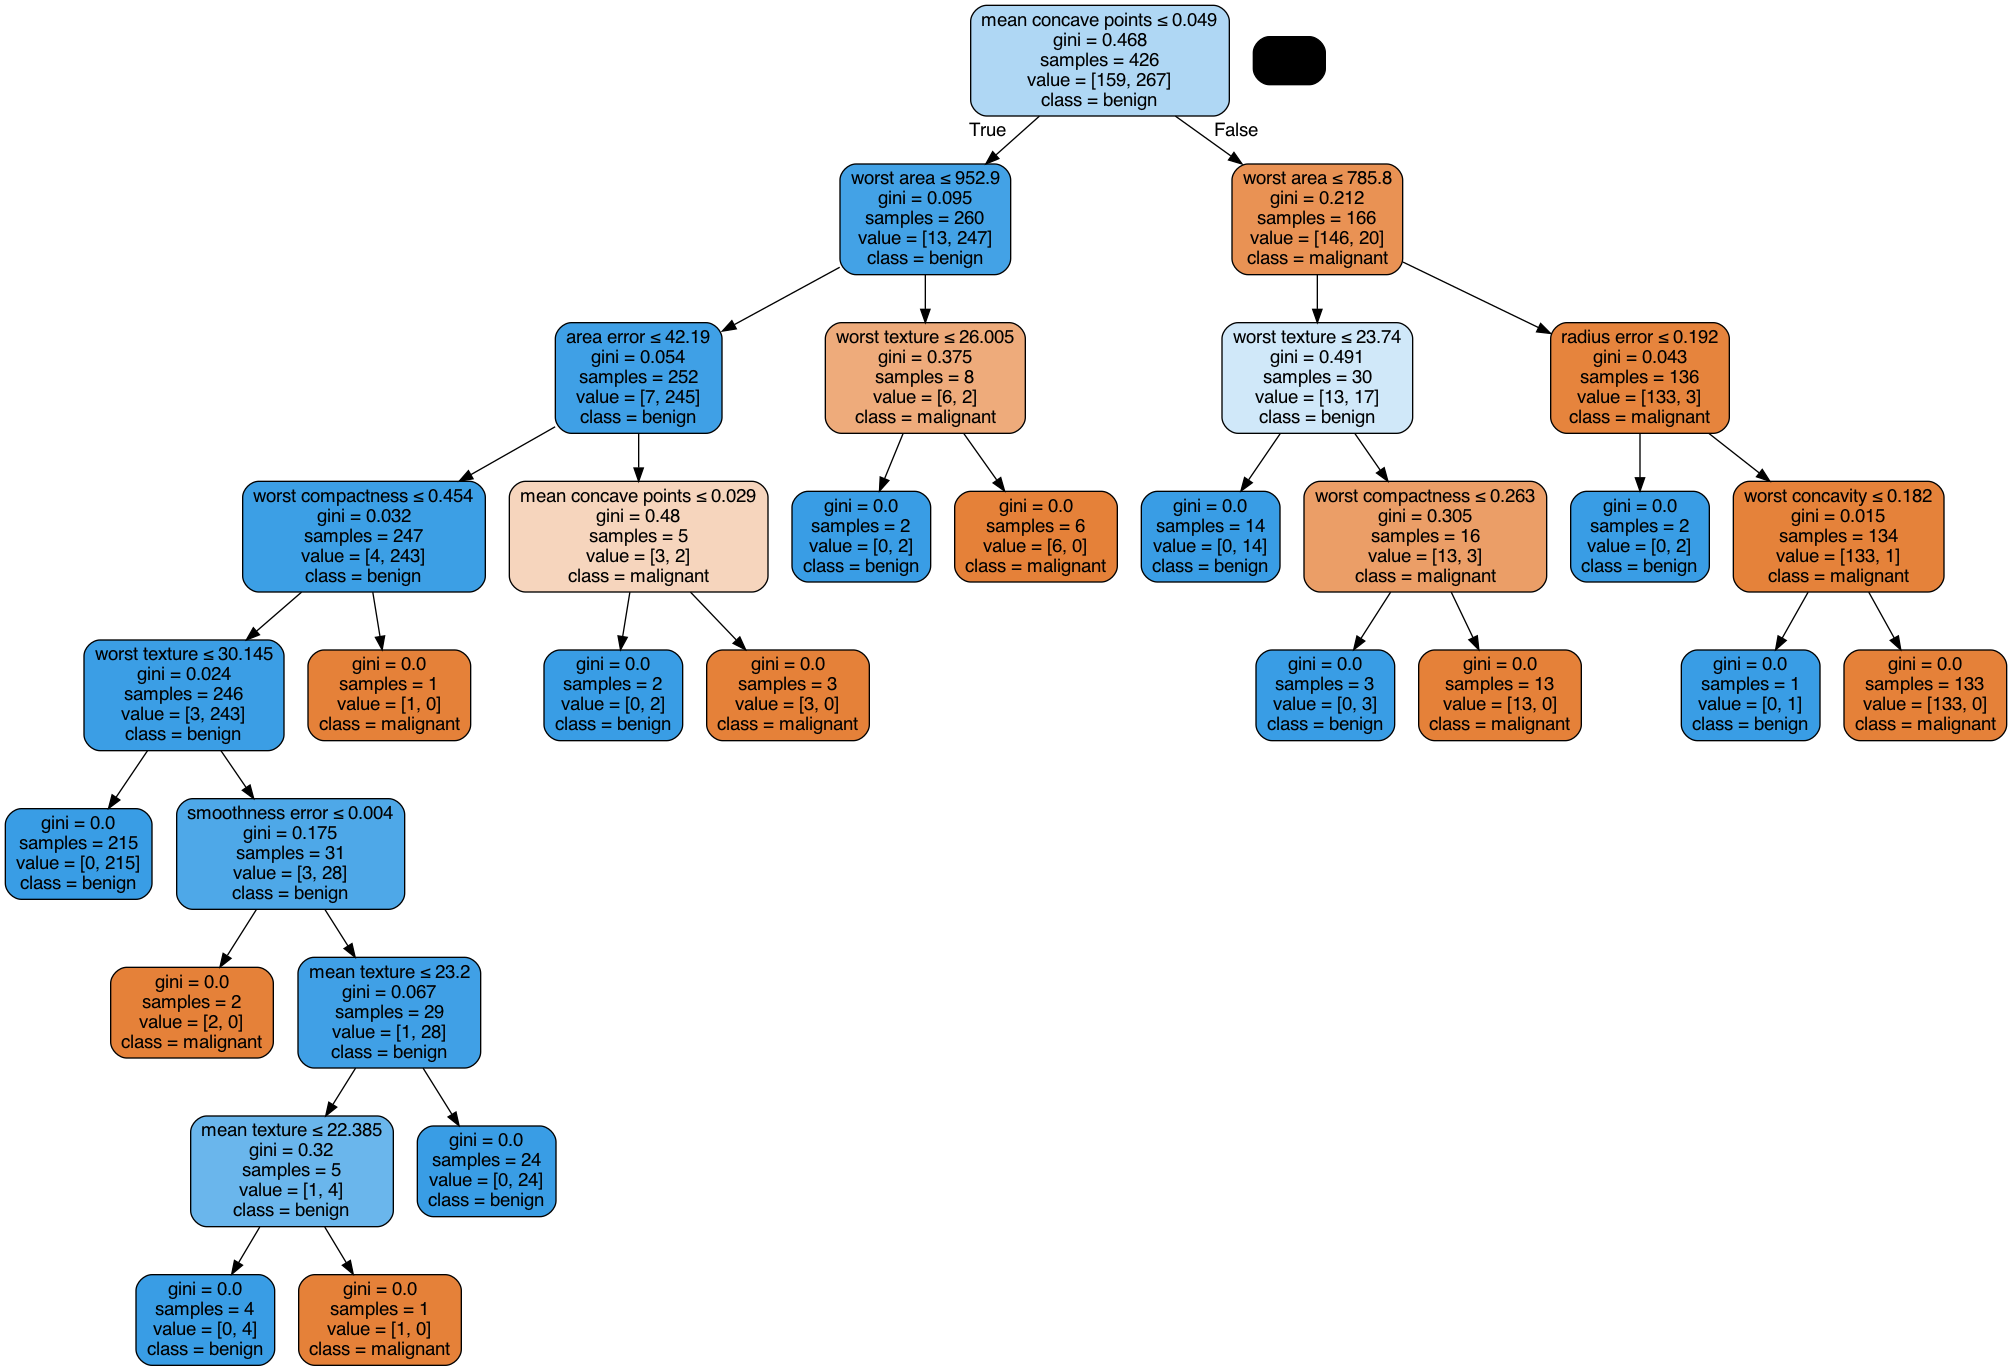

In [20]:
draw_decision_tree(tree_not_tuned ,feature_names, class_names)

In [ ]:
#과제 [6] 어떻게 가지치기를 진행할 지 스스로 계획을 세우고 gridsearch를 통해 파라미터를 조정하여 다시  f1 score 를 구해봅시다! 

In [55]:
tree_tuned = DecisionTreeClassifier(max_leaf_nodes=4, min_samples_leaf=20)
tree_tuned.fit(X_train, y_train)

tree_scores = cross_validate(tree_tuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 수동으로 tuning 되었을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

parameter가 수동으로 tuning 되었을 때의 F1 Score : 0.918


In [54]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# 조절하고자 하는 하이퍼파라미터들을 지정 
hyperparamters = {'max_leaf_nodes': list(range(2, 8)),  'min_samples_leaf': list(range(2, 20))}

# GridSearch 진행
from sklearn.model_selection import GridSearchCV
GridCV = GridSearchCV(estimator=tree_not_tuned, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_leaf_nodes': 5, 'min_samples_leaf': 10}

In [ ]:
#과제 [7] 다시 모델의 f1스코어를 비교해보세요 

In [58]:
tree_tuned = DecisionTreeClassifier(max_leaf_nodes=5, min_samples_leaf=10)
tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, min_samples_leaf=10)

In [59]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']

tree_scores = cross_validate(tree_tuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False) #학습데이터에 대해 교차검증하세요

print("parameter가 tuning 됐을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

parameter가 tuning 됐을 때의 F1 Score : 0.936


In [ ]:
#과제[8] 계획과 해보신 결과에 대해서 말씀해주세요
max_leaf_nodes를 4, min_samples_leaf를 20로 설정하였을 때 f1 스코어는 0.918였다.
이후 GridSearch를 통해 찾은 최적의 파라미터는 max_leaf_nodes=5, min_samples_leaf=10였다.
최적의 파라미터를 이용하여 트리를 튜닝하였을 때 f1 스코어는 0.936으로 증가하였다. 

#Ensemble Method

In [60]:
iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이, 너비
Y = iris.target

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2021,shuffle=True)

In [62]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 모델 선정하여 

##voting

In [65]:
# 데이터셋 로드
iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이, 너비
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2021, shuffle=True)

# 약한 학습기 구축
log_model = LogisticRegression() # 로지스틱회귀
rnd_model = RandomForestClassifier() #랜덤포레스트분류
svm_model = SVC() # 서포트벡터머신

#밑에 약한학습기를 더 추가해보세요  import 하신후! 
from xgboost import XGBClassifier
xgb_model = XGBClassifier() #XGB분류



```
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
# VotingClassifier
from sklearn.ensemble import VotingClassifier

# ensemble 할 model 정의
models = [
    ('ada', AdaBoostClassifier()),
    ('bc', BaggingClassifier()),
    ('etc',ExtraTreesClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ('rfc', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True)),
    ('xgb', XGBClassifier()),
    ('lgbm', LGBMClassifier()),
    ('dtc', DecisionTreeClassifier()),
    ('lr', LogisticRegressionCV()),
    ('ridge', RidgeClassifier()),
]
```





```
# 앙상블 모델 구축
# 만약에 모든 모델이 predict_proba() 메서드가 있으면, 예측의 평균을 내어 soft voting(간접 투표)도 할수 있다.
# 간접 투표 방식은 확률이 높은 투표에 비중을 두기 때문에 성능이 더 높다. (voting='soft' 사용)
# svc는 기본적으로 predict_proba를 제공하지 않아, probability = True 지정 해야 사용 가능
# 대신 svc에서 probability = True를 지정하면 교차 검증을 사용해서 확률을 추정하기 때문에 훈련 속도 느려짐
# 대신 성능을 올라감
```




In [ ]:
#과제 - 약한 학습기 추가로 구축해보세요! 위에 인자참고해서! 
# gradient boost, xgboost, 

In [66]:
voting_model = VotingClassifier(
    estimators=[('lr', log_model), ('rf', rnd_model), ('svc', svm_model), ('xgb', xgb_model)], # 3개의 약한 학습기 외 한 개 더 추가해보세요 
    voting='hard' # 직접 투표(hard voting)
)


In [68]:
# 앙상블 모델 학습
voting_model.fit(x_train,y_train)


# 모델 비교
for model in (log_model, rnd_model, svm_model, xgb_model, voting_model) : 
  model.fit(x_train,y_train) #각각의 모델에 대하여 트레인 데이터 피팅 
  y_pred = model.predict(x_test)  # 예측값 
  print(model.__class__.__name__," : ",accuracy_score(y_test,y_pred))

LogisticRegression  :  1.0
RandomForestClassifier  :  0.9555555555555556
SVC  :  1.0
XGBClassifier  :  0.9555555555555556
VotingClassifier  :  0.9555555555555556


#---- 아래로 부터는 내용정리 과제입니다--- 

##배깅 

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 구축
# BaggingClassifier에서 사용한 분류기가 클래스 확률추정(predict_proba)이 가능하면 자동으로 간접 투표 사용 
bag_model = BaggingClassifier(
    DecisionTreeClassifier(), # 약한 학습기(결정 트리)
    n_estimators=500, # 약한 학습기(결정 트리) 500개 생성
    max_samples=0.05, # 0.0~1.0 사이 실수 선택(실수 x 샘플 수) 혹은 샘플수 지정
    bootstrap=True, # True : 배깅, False : 페이스팅
    n_jobs=-1 # 훈련과 예측에 사용할 CPU 코어 수 (-1 : 가용한 모든 코어 사용)
)

# 모델 학습
bag_model.fit(x_train,y_train)

# 모델 예측
y_pred = bag_model.predict(x_test)

# 모델 평가
print(bag_model.__class__.__name__," : ",accuracy_score(y_test,y_pred))

BaggingClassifier  :  0.9777777777777777


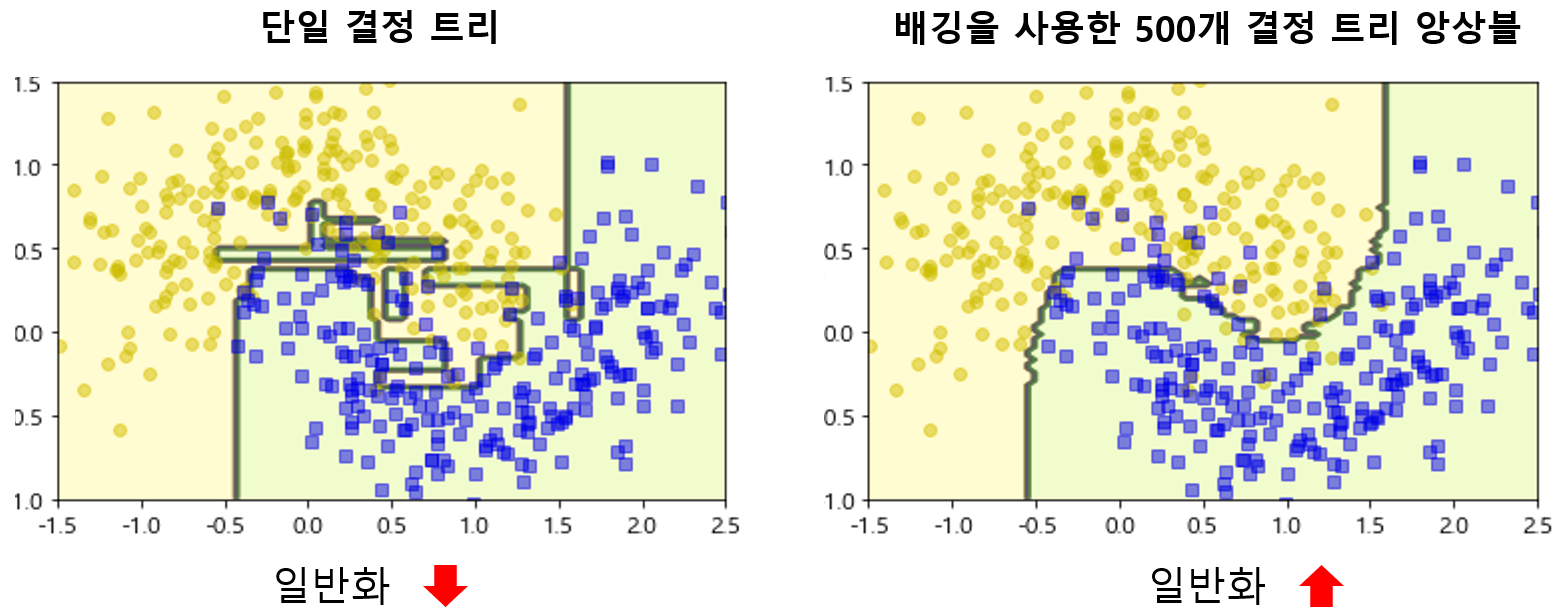

In [70]:
# 모델 구축
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    bootstrap = True,
    n_jobs = -1,
    oob_score = True # oob평가를 위해 True를 지정한다.
)

# 모델 학습
bag_model.fit(x_train,y_train)

# 모델 평가(oob_score_)
print('oob_score : ',bag_model.oob_score_)

# 모델 평가
y_pred = bag_model.predict(x_test)
print('test_score : ',accuracy_score(y_test,y_pred))

oob_score :  0.9523809523809523
test_score :  0.9777777777777777


##배깅- RandomForest

###랜덤 포레스트의 특징 : bootstrap 으로 뽑는다, 변수중요도를 구할 수 있다.

In [71]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 구축
rnd_model = RandomForestClassifier(
    n_estimators = 500, # 예측기 500개
    max_leaf_nodes = 16, # 자식노드의 최대 개수 
    n_jobs = -1 # CPU 코어 구동 개수
)

# 모델 학습
rnd_model.fit(x_train,y_train)

# 모델 예측
y_pred_rf = rnd_model.predict(x_test)

# 모델 평가
print("rnd_model : ",accuracy_score(y_pred_rf,y_test))

rnd_model :  0.9555555555555556


###변수중요도 확인

In [74]:
#데이터셋 정의
x = iris.data[:,:]
y = iris.target

# 모델 구축
rnd_model = RandomForestClassifier(
    n_estimators = 500,
    n_jobs = -1
)

# 모델 학습
rnd_model.fit(x,y)

# 특성 중요도 확인 (전체 특성 중요도 합 : 1)
for feature_name,feature_imp in zip(iris['feature_names'],rnd_model.feature_importances_):
  print(feature_name,':',feature_imp)

sepal length (cm) : 0.10574295445671711
sepal width (cm) : 0.023702072745461922
petal length (cm) : 0.421836619805476
petal width (cm) : 0.448718352992345


##부스팅

###AdaBoost 

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 아다부스트 모델 구축
# 아다부스트의 학습기 : Decision Tree (max_depth =1) 사용
# 학습기 개수(n_estimators) : 200개
# SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function) 알고리즘 사용
# 기본 학습기가 확률 추정(predict_proba)이 가능하면 SAMME.R 사용 -> 일반적으로 성능이 더 좋음
ada_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators = 200,
    algorithm = 'SAMME.R',
    learning_rate=0.5
)

# 모델 학습
ada_model.fit(x,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [ ]:
###과제! adaboost 에 특징, 장점을 1~2 문장으로 정리해주세요

특징: 분류기마다 중요도를 고려하여 가중치가 부여된다.
    

장점: 약분류기의 실수가 반영되어 가중치를 수정하기 때문에 정확도가 향상되며 과적합의 우려가 줄어든다.



###Gradient Boost 

In [76]:
from sklearn.tree import DecisionTreeRegressor

iris = load_iris()
x = iris.data[:,2:] 
y = iris.target

# 결정트리(max_depth=3) 모델 구축 및 학습
tree_reg_model_1 = DecisionTreeRegressor(max_depth=3)
tree_reg_model_1.fit(x,y)

# 첫 번째 학습기에서 발생한 잔차를 목적함수로 모델 학습
residual_1 = y - tree_reg_model_1.predict(x)
tree_reg_model_2 = DecisionTreeRegressor(max_depth=3)
tree_reg_model_2.fit(x,residual_1)

# 두 번째 학습기에서 발생한 잔차를 목적함수로 모델 학습
residual_2 = y - tree_reg_model_2.predict(x)
tree_reg_model_3 = DecisionTreeRegressor(max_depth=3)
tree_reg_model_3.fit(x,residual_2)

# 새로운 데이터를 세 개의 트리를 포함한 앙상블 모델로 예측
x_new = [[1.1,0.3]]
prediction = sum(tree.predict(x_new) for tree in [tree_reg_model_1,tree_reg_model_2,tree_reg_model_3])
prediction

array([-5.20417043e-18])

###XGBoost

### 과제 !! XGboost 의 장점을 적어주세요






이곳에 적어주세요 : 병렬 처리로 인한 높은 학습 및 분류 속도

In [77]:
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from xgboost import plot_importance, plot_tree

In [78]:
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()
X_train, X_test , y_train, y_test = train_test_split(cancer.data, cancer.target,test_size=0.2,random_state=100)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)

In [79]:
params = {
    'max_depth' :3 ,
    'eta' : 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stopping' : 100,
    }
num_rounds=400 

In [80]:
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain ,num_boost_round=num_rounds , early_stopping_rounds=100,evals=evals)

[01:41:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.61157	eval-logloss:0.61460
[1]	train-logloss:0.54459	eval-logloss:0.55405
[2]	train-logloss:0.48760	eval-logloss:0.49816
[3]	train-logloss:0.43613	eval-logloss:0.44858
[4]	train-logloss:0.39411	eval-logloss:0.40558
[5]	train-logloss:0.35700	eval-logloss:0.37227
[6]	train-logloss:0.32370	eval-logloss:0.34176
[7]	train-logloss:0.29441	eval-logloss:0.31699
[8]	train-logloss:0.26823	eval-logloss:0.29199
[9]	train-logloss:0.24541	eval-logloss:0.27386
[10]	train-logloss:0.22565	eval-logloss:0.25490
[11]	train-logloss:0.20728	e

[161]	train-logloss:0.00769	eval-logloss:0.09295
[162]	train-logloss:0.00767	eval-logloss:0.09272
[163]	train-logloss:0.00764	eval-logloss:0.09294
[164]	train-logloss:0.00760	eval-logloss:0.09352
[165]	train-logloss:0.00758	eval-logloss:0.09340
[166]	train-logloss:0.00756	eval-logloss:0.09317
[167]	train-logloss:0.00753	eval-logloss:0.09321
[168]	train-logloss:0.00752	eval-logloss:0.09307
[169]	train-logloss:0.00748	eval-logloss:0.09332
[170]	train-logloss:0.00747	eval-logloss:0.09348
[171]	train-logloss:0.00745	eval-logloss:0.09327
[172]	train-logloss:0.00743	eval-logloss:0.09313
[173]	train-logloss:0.00741	eval-logloss:0.09332
[174]	train-logloss:0.00739	eval-logloss:0.09321
[175]	train-logloss:0.00737	eval-logloss:0.09337
[176]	train-logloss:0.00736	eval-logloss:0.09331
[177]	train-logloss:0.00734	eval-logloss:0.09352
[178]	train-logloss:0.00732	eval-logloss:0.09332
[179]	train-logloss:0.00731	eval-logloss:0.09318
[180]	train-logloss:0.00728	eval-logloss:0.09338
[181]	train-logloss:

In [81]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[0.    0.916 0.013 1.    0.997 0.997 0.014 0.    0.994 0.989]


In [82]:
import matplotlib.pyplot as plt

###변수간 중요도 확인 가능!

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

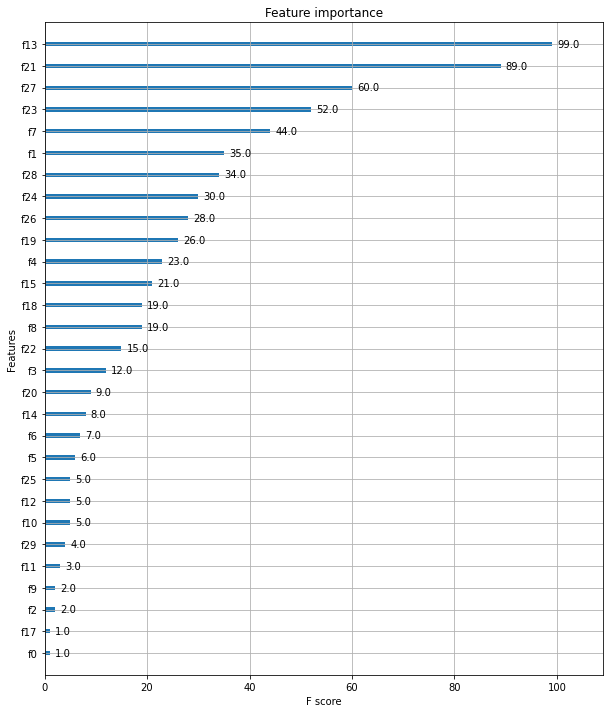

In [83]:
fig ,ax =plt.subplots(figsize=(10,12))
plot_importance(xgb_model , ax=ax)